# Complementay Macroeconomics

# Third Session

In [6]:
import matplotlib.pyplot 

[]

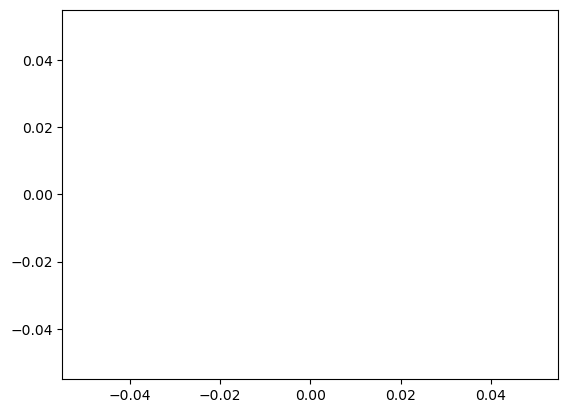

In [8]:
matplotlib.pyplot.plot()

## Using Alias

[]

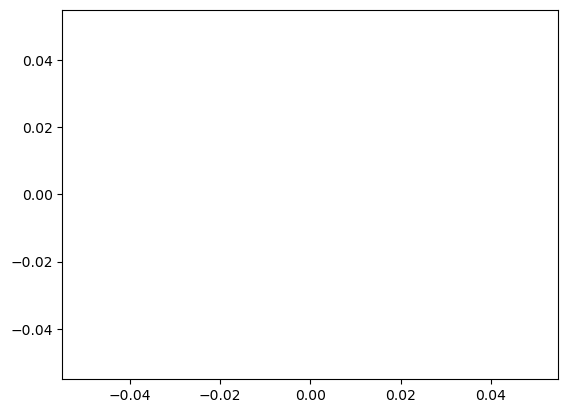

In [11]:
import matplotlib.pyplot as plt

plt.plot()

## What can we plot?

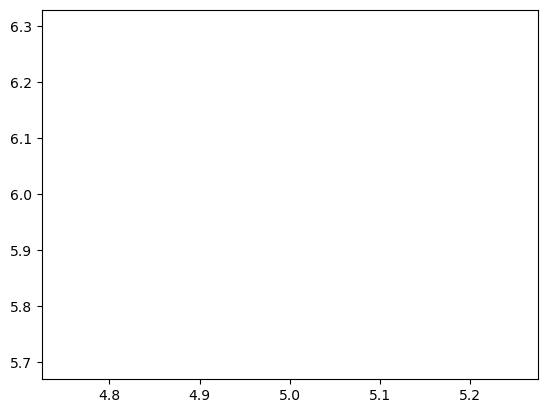

In [15]:
plt.plot(5, 6)

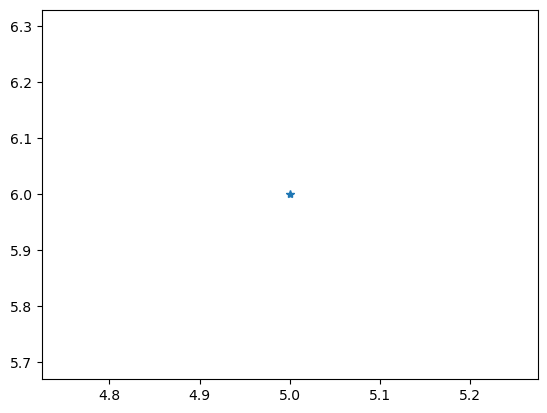

In [17]:
plt.plot(5, 6, marker = '*')

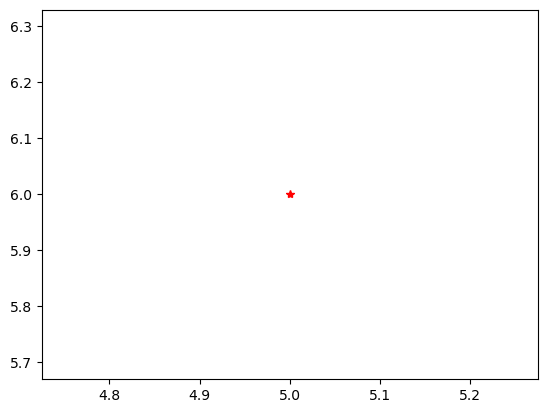

In [21]:
plt.plot(5, 6, marker = '*', color = 'red')
plt.show()

## The easiest thing to plot is a dot

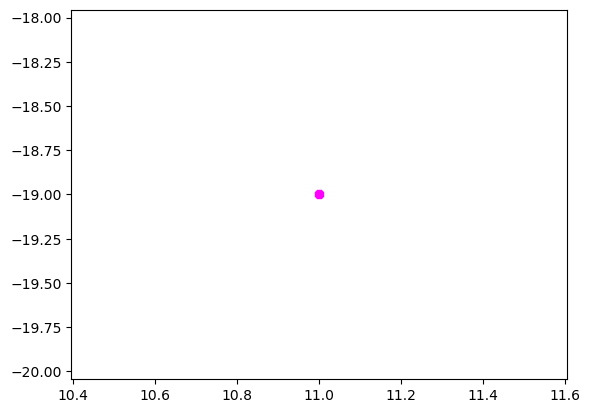

In [24]:
x = 11
y = -19
plt.plot(x, y, marker = '8', color = 'magenta')
plt.show()

## plotting intervals of data

In [116]:
Q = 1, 2, 3, 4, 5, 6, 7
Z = 100, 101, 102, 103, 104, 105, 106

In [29]:
a = 2
print(a)

2


## What do we expect from print(Q)?

In [32]:
print(Q)

(1, 2, 3, 4, 5, 6, 7)


## Be careful: strings are always defined by " " or ' ' or """ """.

In [35]:
print(type(Q))

<class 'tuple'>


## Using dir() function to Explore data types and functions

In [114]:
#dir(Q)

## From __add__ to __subclasshook__ Are Magic Methods; count and index Are Standard Methods

### Calling the second element of the tuple

In [50]:
Q[1]

2

In [52]:
Q.count

<function tuple.count(value, /)>

In [58]:
Q.count(10)

0

In [66]:
Q.index(5)

4

## Question:

### Are methods similar to functions?

In [83]:
a = 2 
#dir(a)

In [81]:
a.real

2

In [93]:
b = 2 + 5j # is equal to 2 + 5i

In [97]:
print("the real part of the complex number:", b.real)
print("the imaginary part of the complex number:", b.imag)

the real part of the complex number: 2.0
the imaginary part of the complex number: 5.0


## Answer:

### They are similar in the sense that both are functions and operate on the given argument. However, they are different because methods are sensitive to the type of the data.

In [99]:
a.count()

AttributeError: 'int' object has no attribute 'count'

## Back to plotting

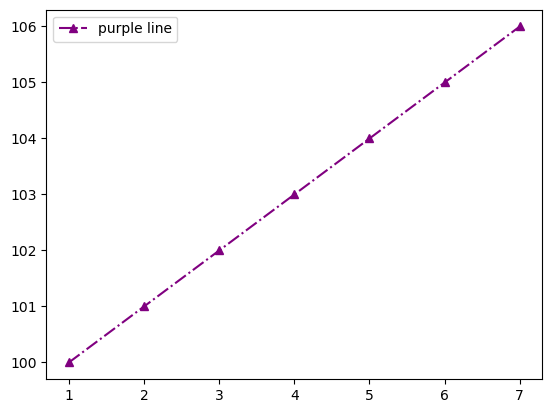

In [135]:
plt.plot(Q, Z, color = 'purple', linestyle = '-.', marker = '^', label = "purple line")
plt.legend() #this will call out the label = "purple line"
plt.show()

## len() function (length)

In [121]:
len(Q)

7

In [123]:
print("The number of data in Z is:", len(Z))

The number of data in Z is: 7


# Scatter Plot

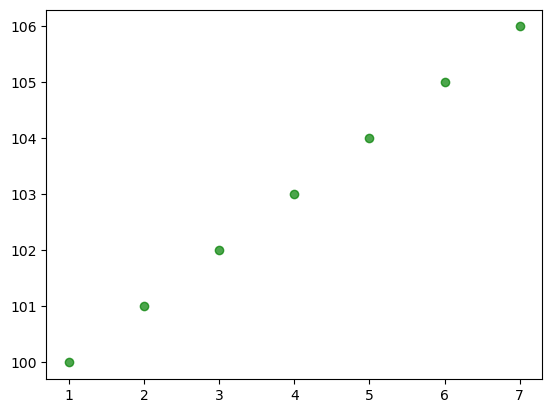

In [181]:
plt.scatter(Q, Z, color = "green", alpha = 0.7)
plt.show()

# Using real world data (fred library)

- https://www.stlouisfed.org/

- https://fred.stlouisfed.org/

In [140]:
# pip install fredapi

In [144]:
# pip install pandas

In [146]:
from fredapi import Fred

In [158]:
function_fred = Fred(api_key = 'my private key')

In [164]:
sp500 = function_fred.get_series('SP500')

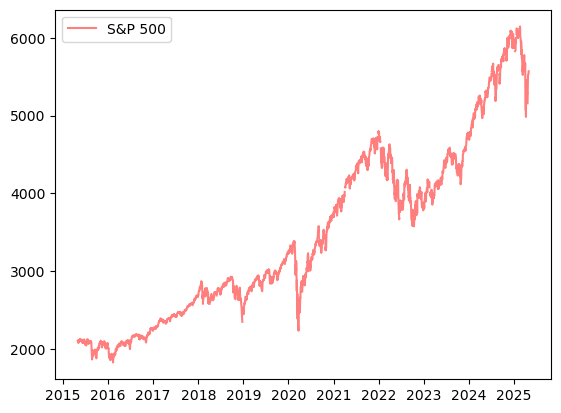

In [166]:
plt.plot(sp500, color = "red", alpha = 0.5, label = "S&P 500")
plt.legend()
plt.show()

In [168]:
Real_GDP_Per_Capita_USA = function_fred.get_series("A939RX0Q048SBEA")

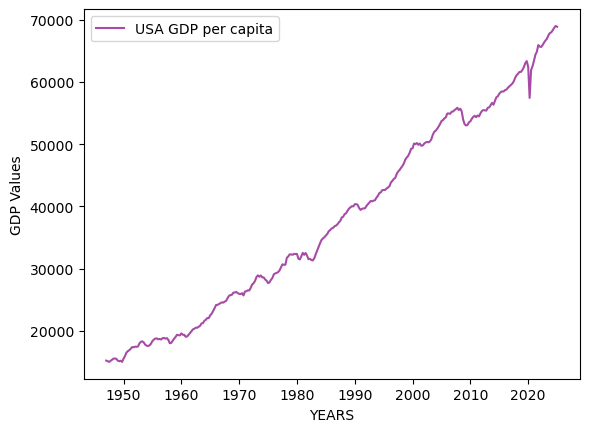

In [268]:
plt.plot(Real_GDP_Per_Capita_USA, color = 'purple', alpha = 0.7, label = "USA GDP per capita")
plt.xlabel("YEARS")
plt.ylabel("GDP Values")
plt.legend()
plt.show()

# Inflation = Money Growth - Real GDP Growth 

# inflation of Japan based on Consumer Price Index (CPI)

In [376]:
start_date = '1/1/2010/'
end_date = "6/1/2016"

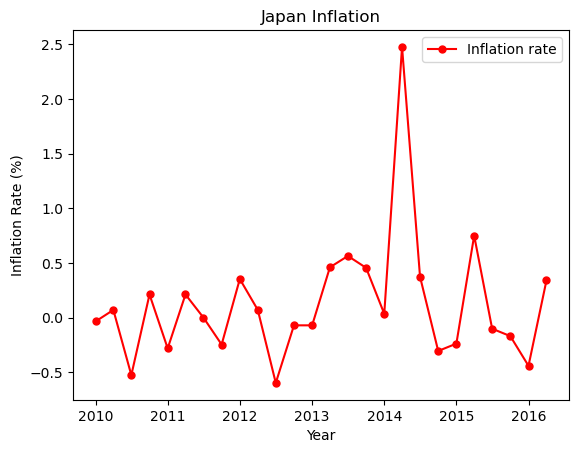

In [378]:
import matplotlib.pyplot as plt

#Fetch CPI inflation data
japan_cpi_inflation = function_fred.get_series("CPALTT01JPQ657N", start_date, end_date)

plt.plot(japan_cpi_inflation, color='red', linestyle='-', marker='o', markersize=5, label="Inflation rate")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.title("Japan Inflation")
plt.legend()

plt.show()


## Japan Real GDP

In [366]:
start_date = '1/1/2010/'
end_date = "1/6/2016"

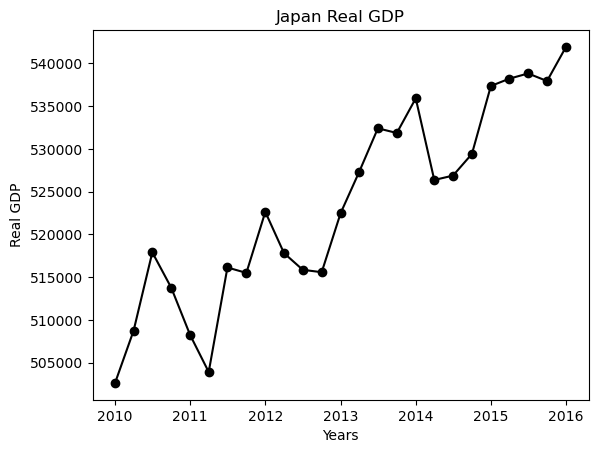

In [368]:
real_gdp_japan = function_fred.get_series("JPNRGDPEXP", start_date, end_date)

plt.plot(real_gdp_japan, color = 'black', marker = 'o')
plt.title("Japan Real GDP")
plt.xlabel("Years")
plt.ylabel("Real GDP")
plt.show()

In [313]:
real_gdp_japan.head()

2010-01-01    502627.5
2010-04-01    508737.2
2010-07-01    517897.1
2010-10-01    513759.9
2011-01-01    508215.0
dtype: float64

## Japan M2

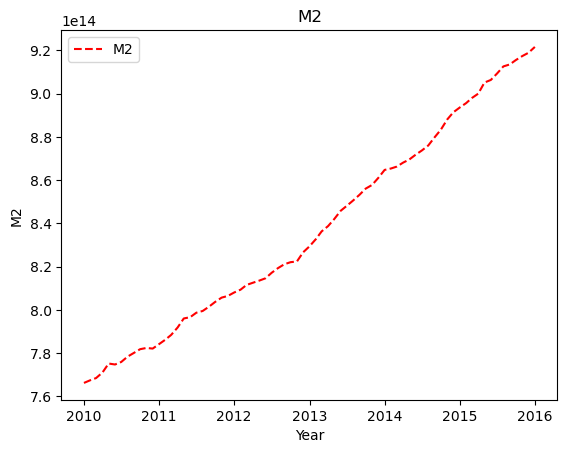

In [306]:
japan_m2 = function_fred.get_series("MYAGM2JPM189S", start_date, end_date)

plt.plot(japan_m2, color = "red", linestyle = '--', label = 'M2')
plt.title("M2")
plt.xlabel("Year")
plt.ylabel("M2")
plt.legend()
plt.show()

In [315]:
japan_m2.tail()

2015-09-01    9.134667e+14
2015-10-01    9.155114e+14
2015-11-01    9.173389e+14
2015-12-01    9.188608e+14
2016-01-01    9.215636e+14
dtype: float64

## Resampling Monthly M2 Data to Quarterly for Consistency with GDP

### Since GDP data is quarterly, but M2 data is monthly, we need to resample the monthly data to match the GDP frequency. To do this, we will use the mean of each quarter. While there are multiple methods for resampling, we are using the mean for simplicity.

In [308]:
import pandas as pd

japan_m2_qtr = japan_m2.resample('QE').mean()

In [310]:
japan_m2_qtr.head()

2010-03-31    7.674225e+14
2010-06-30    7.736854e+14
2010-09-30    7.781593e+14
2010-12-31    7.821317e+14
2011-03-31    7.863101e+14
Freq: QE-DEC, dtype: float64

# Calculating the Growth rates

.pct_change() calculates the percentage change

In [322]:
m2_growth = japan_m2_qtr.pct_change() * 100
m2_growth.head()

2010-03-31         NaN
2010-06-30    0.816100
2010-09-30    0.578263
2010-12-31    0.510482
2011-03-31    0.534232
Freq: QE-DEC, dtype: float64

In [234]:
gdp_growth = real_gdp_japan.pct_change() * 100
gdp_growth.head()

2010-01-01         NaN
2010-04-01    1.215552
2010-07-01    1.800517
2010-10-01   -0.798846
2011-01-01   -1.079278
dtype: float64

In [236]:
inflation = m2_growth - gdp_growth
inflation.head()

2010-01-01   NaN
2010-03-31   NaN
2010-04-01   NaN
2010-06-30   NaN
2010-07-01   NaN
dtype: float64

## Aligning GDP Growth Data with M2 by Adjusting Index Dates

### Since the dates or indices differ (M2 starts on 2010-06-30, while GDP Growth begins on 2010-04-01), we need to adjust the GDP Growth data to ensure proper alignment.

In [242]:
gdp_growth.index = gdp_growth.index + pd.offsets.QuarterEnd()

In [244]:
inflation = m2_growth - gdp_growth
inflation.head()

2010-03-31         NaN
2010-06-30   -0.399452
2010-09-30   -1.222254
2010-12-31    1.309328
2011-03-31    1.613511
Freq: QE-DEC, dtype: float64

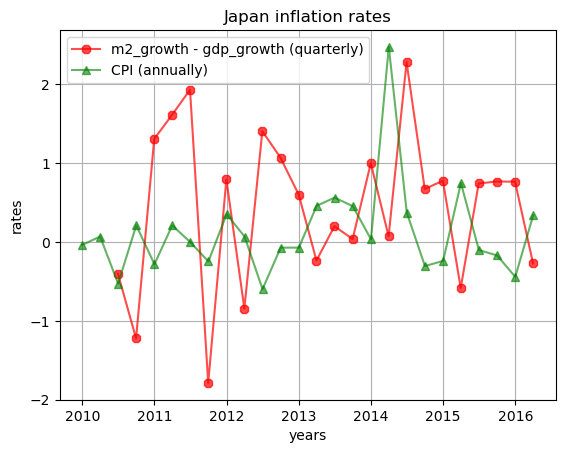

In [380]:
plt.plot(inflation, label = "m2_growth - gdp_growth (quarterly)", color = "red", marker = "8", alpha = 0.7)
plt.plot(japan_cpi_inflation, label = 'CPI (annually)', color = "green", marker = '^', alpha = 0.6)
plt.title("Japan inflation rates")
plt.xlabel("years")
plt.ylabel("rates")
plt.legend()
plt.grid()
plt.show()

# Exercise

## 1. Pick another country or state, calculate inflation as the difference between money growth and real GDP growth, and compare it to CPI-based inflation.

## 2. plot the following data

year = (2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022)

GDP_USA = (15049, 15599, 16254, 16843, 17550, 18206, 18695, 19477, 20533, 21381, 21060, 23315, 25462)

# Note: 

### These calculations are not necessarily precise, as I used the mean method for resampling and had to shift the data to enable subtraction. However, the result is generally acceptable since it falls within the same range as CPI-based inflation. 


### My goal was to teach Python through a practical example, and this is what came to my mind.